# PROJECT 1

# Exploratory Data Analysis

**Import Python Libraries**

In [700]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
import re
import collections
import warnings

from matplotlib import pyplot as plt
from sklego import datasets
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from time import time


%matplotlib inline

**Penguin CSV file**

In [701]:
df = pd.read_csv("penguins_size.csv")  #Read the .csv file

In [702]:
df  #Display the data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [703]:
df.dtypes  #Types

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [704]:
df.columns #Columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [705]:
df.info() #Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [706]:
df.describe() #Describe

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [707]:
df.species.value_counts() 

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [708]:
df.sex.value_counts(dropna=False)

MALE      168
FEMALE    165
NaN        10
.           1
Name: sex, dtype: int64

In [709]:
df.groupby(['species', 'island'], dropna= False).size()

species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
dtype: int64

In [710]:
df.groupby(['species', 'sex'], dropna= False).size()

species    sex   
Adelie     FEMALE    73
           MALE      73
           NaN        6
Chinstrap  FEMALE    34
           MALE      34
Gentoo     .          1
           FEMALE    58
           MALE      61
           NaN        4
dtype: int64

In [711]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [712]:
df.dropna(inplace=True) 
output = df['species'] 
features = df[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']] 
features = pd.get_dummies(features) 
output, uniques = pd.factorize(output)
print('Here is what our unique output variables represent') 
print(uniques)
print('Here are our feature variables') 
print(features.head())

Here is what our unique output variables represent
Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object')
Here are our feature variables
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   island_Biscoe  island_Dream  island_Torgersen  sex_.  sex_FEMALE  sex_MALE  
0              0             0                 1      0           0         1  
1              0             0                 1      0           1         0  
2              0             0                 1      0           1         0  
4              0             0                 1      0           1         0  
5              0            

In [713]:
penguins = sns.load_dataset('penguins').dropna()

In [ ]:
pip install scikit-lego

**Exploring different types of Graphs**

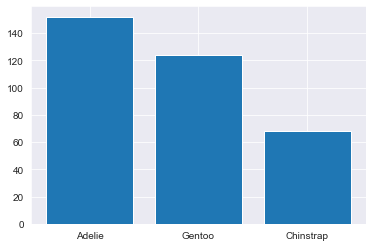

In [715]:
X, y = datasets.load_penguins(return_X_y=True)
counter = collections.Counter(y)
plt.bar(counter.keys(), counter.values())
plt.show()

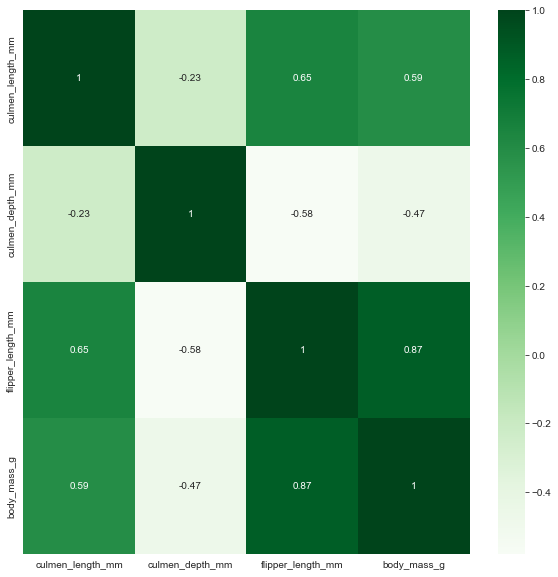

In [716]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap= 'Greens')
plt.show()

In [717]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119], dtype=int64))

In [718]:
adelie = penguins[penguins.species == 'Adelie']
chinstrap = penguins[penguins.species == 'Chinstrap']
gentoo = penguins[penguins.species == 'Gentoo']            

In [719]:
np.unique(adelie.island, return_counts=True)
np.unique(adelie.sex, return_counts=True)
np.unique(chinstrap.island, return_counts=True)
np.unique(chinstrap.sex, return_counts=True)
np.unique(gentoo.island, return_counts=True)
np.unique(gentoo.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([58, 61], dtype=int64))

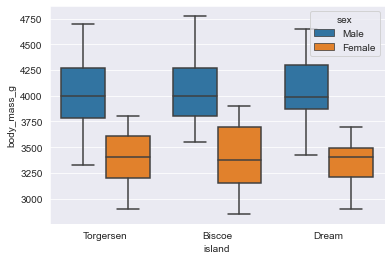

In [720]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

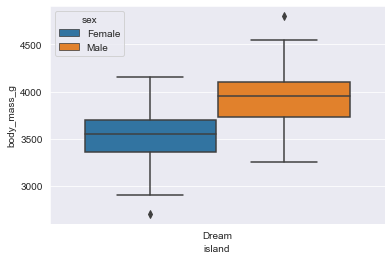

In [721]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=chinstrap)

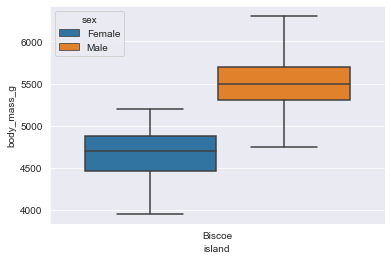

In [722]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=gentoo)

Text(0.5, 1.0, 'Scatterplot Flipper Length vs. Body Mass ')

<Figure size 720x720 with 0 Axes>

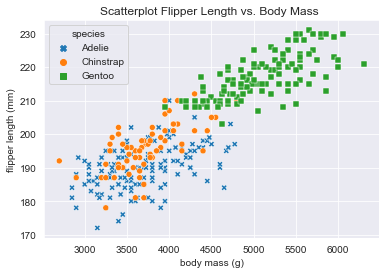

In [723]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
markers = {"Adelie": "X", "Gentoo": "s", "Chinstrap":'o'}
fig, ax = plt.subplots() 
ax = sns.scatterplot(data = df, x = 'body_mass_g', 
  y = 'flipper_length_mm', hue = 'species', markers = markers,
  style = 'species') 
plt.xlabel('body mass (g)') 
plt.ylabel('flipper length (mm)') 
plt.title("Scatterplot Flipper Length vs. Body Mass ")           

The Gentoo species have a higher flipper length and body mass. Flipper length is correlated with body mass for each species. 

Text(0.5, 1.0, 'Scatterplot of Culmen Length vs. Body Mass')

<Figure size 720x720 with 0 Axes>

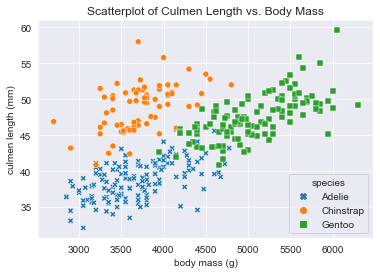

In [724]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
markers = {"Adelie": "X", "Gentoo": "s", "Chinstrap":'o'}
fig, ax = plt.subplots() 
ax = sns.scatterplot(data = df, x = 'body_mass_g', 
  y = 'culmen_length_mm', hue = 'species', markers = markers,
  style = 'species') 
plt.xlabel('body mass (g)') 
plt.ylabel('culmen length (mm)') 
plt.title("Scatterplot of Culmen Length vs. Body Mass")           

Text(0.5, 1.0, 'Scatterplot of Flipper Length vs. Culmen Length')

<Figure size 720x720 with 0 Axes>

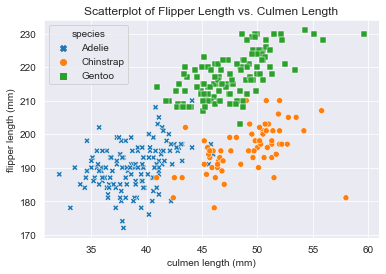

In [725]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
markers = {"Adelie": "X", "Gentoo": "s", "Chinstrap":'o'}
fig, ax = plt.subplots() 
ax = sns.scatterplot(data = df, x = 'culmen_length_mm', 
  y = 'flipper_length_mm', hue = 'species', markers = markers,
  style = 'species') 
plt.xlabel('culmen length (mm)') 
plt.ylabel('flipper length (mm)') 
plt.title("Scatterplot of Flipper Length vs. Culmen Length")           

Text(0, 0.5, 'flipper length (mm)')

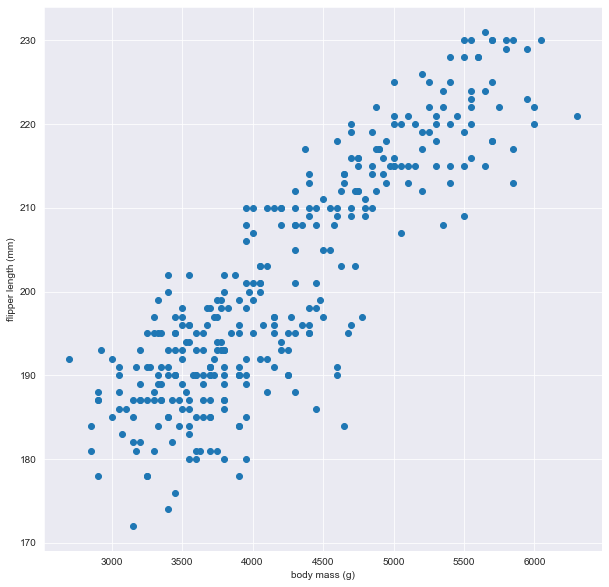

In [726]:
plt.figure(figsize=(10,10))
plt.scatter(x='body_mass_g', y='flipper_length_mm', data = df)
plt.xlabel('body mass (g)')
plt.ylabel('flipper length (mm)')

<function matplotlib.pyplot.show(close=None, block=None)>

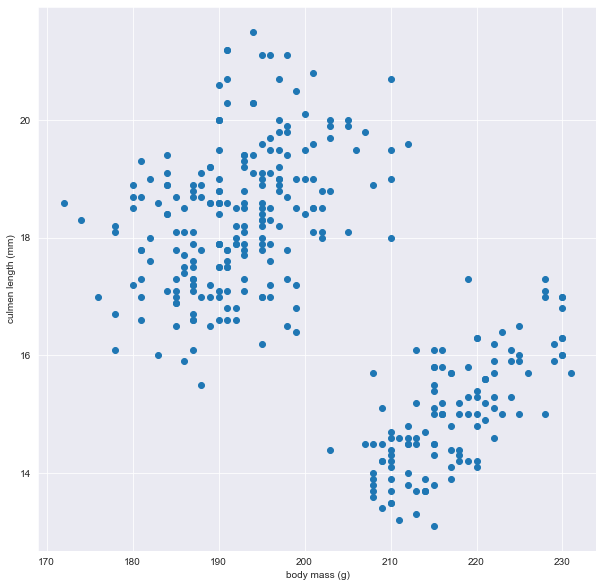

In [727]:
plt.figure(figsize=(10,10))
plt.scatter(x='flipper_length_mm', y='culmen_depth_mm', data = df)
plt.xlabel('body mass (g)')
plt.ylabel('culmen length (mm)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

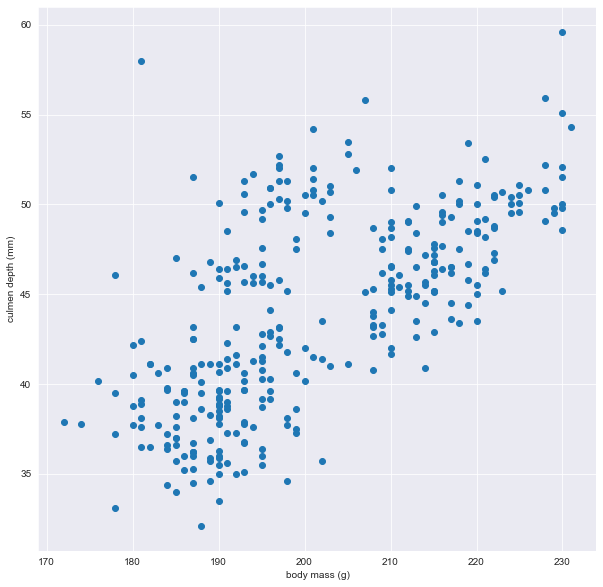

In [728]:
plt.figure(figsize=(10,10))
plt.scatter(x='flipper_length_mm', y='culmen_length_mm', data = df)
plt.xlabel('body mass (g)')
plt.ylabel('culmen depth (mm)')
plt.show

In [729]:
df.drop_duplicates()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [730]:
penguin_num = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
df['species'] = df['species'].map(penguin_num)
island_num = {'Biscoe':0, 'Dream':1, 'Torgersen':2}
df['island'] = df['island'].map(island)
gender_num = {'MALE':0, 'FEMALE':1, 'Other':2}
df['sex'] = df['sex'].map(gender)
df['sex'] = df['sex'].fillna(3)
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(0)
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(0)
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(0)
df['body_mass_g'] = df['body_mass_g'].fillna(0)

# Experiment 2 Ratios for 3 Algorithms

**First Ratio of Training, Validation & Test Data: 60-20-20**

In [731]:
features = df.drop('species', axis=1)
labels = df['species']

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.4, random_state=42)
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5, random_state=42)

for dataset in [train_labels, val_labels, test_labels]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


**Algorithms used: LR, SVM, RF**

In [ ]:
pip install sklearn-pandas

In [733]:
train_features.to_csv('train_features.csv', index=False)
val_features.to_csv('val_features.csv', index=False)
test_features.to_csv('test_features.csv', index=False)

train_labels.to_csv('train_labels.csv', index=False)
val_labels.to_csv('val_labels.csv', index=False)
test_labels.to_csv('test_labels.csv', index=False)

In [734]:
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [735]:
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
features = 'train_features.csv'
tr_features = pd.read_csv(features)

labels = 'train_labels.csv'
tr_labels = pd.read_csv(labels)

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
lr = LogisticRegression()

parameters = {
    'C':[0.001, 0.01, 0.1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

In [737]:
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'LR_Model.pkl')

['LR_Model.pkl']

In [ ]:
def create_learning_curve(est, x, y):
    train_size, train_scores, test_scores = learning_curve(est, X=x, y=y)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_size, train_mean, color= 'green', marker = 'X', markersize=5, label = "Training Score")
    plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color = 'green' )
    plt.plot(train_size, test_mean, color= 'red', marker = '+', markersize=5, linestyle= '--',label = "Cross-validation Score")
    plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'red' )
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    
    
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())

In [739]:
svc = SVC()

parameters = {
    'kernel' : ['linear', 'rbf'],
    'C':[0.1, 1, 10]
}
cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.985 (+/-0.04) for {'C': 0.1, 'kernel': 'linear'}
0.705 (+/-0.156) for {'C': 0.1, 'kernel': 'rbf'}
0.975 (+/-0.032) for {'C': 1, 'kernel': 'linear'}
0.71 (+/-0.112) for {'C': 1, 'kernel': 'rbf'}
0.97 (+/-0.037) for {'C': 10, 'kernel': 'linear'}
0.695 (+/-0.107) for {'C': 10, 'kernel': 'rbf'}


In [740]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

In [741]:
joblib.dump(cv.best_estimator_, 'SVM_Model.pkl')

['SVM_Model.pkl']

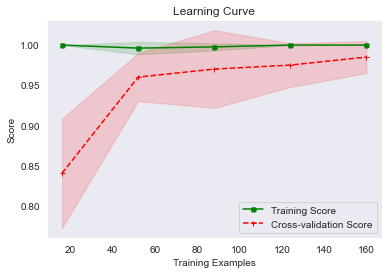

In [742]:
def create_learning_curve(est, x, y):
    train_size, train_scores, test_scores = learning_curve(est, X=x, y=y)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_size, train_mean, color= 'green', marker = 'X', markersize=5, label = "Training Score")
    plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color = 'green' )
    plt.plot(train_size, test_mean, color= 'red', marker = '+', markersize=5, linestyle= '--',label = "Cross-validation Score")
    plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'red' )
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    
    
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())

In [743]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]

}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 50}

0.88 (+/-0.097) for {'max_depth': 2, 'n_estimators': 5}
0.955 (+/-0.058) for {'max_depth': 2, 'n_estimators': 50}
0.95 (+/-0.063) for {'max_depth': 2, 'n_estimators': 250}
0.975 (+/-0.045) for {'max_depth': 4, 'n_estimators': 5}
0.985 (+/-0.04) for {'max_depth': 4, 'n_estimators': 50}
0.98 (+/-0.037) for {'max_depth': 4, 'n_estimators': 250}
0.975 (+/-0.032) for {'max_depth': 8, 'n_estimators': 5}
0.99 (+/-0.024) for {'max_depth': 8, 'n_estimators': 50}
0.99 (+/-0.024) for {'max_depth': 8, 'n_estimators': 250}
0.97 (+/-0.073) for {'max_depth': 16, 'n_estimators': 5}
0.995 (+/-0.02) for {'max_depth': 16, 'n_estimators': 50}
0.98 (+/-0.037) for {'max_depth': 16, 'n_estimators': 250}
0.99 (+/-0.024) for {'max_depth': 32, 'n_estimators': 5}
0.985 (+/-0.04) for {'max_depth': 32, 'n_estimators': 50}
0.99 (+/-0.024) for {'max_depth': 32, 'n_estimators': 250}
0.985 (+/-0.04) for {'max_depth': None, 'n_estimators': 5}
0.985 (+/-0.04) for {'max

In [744]:
joblib.dump(cv.best_estimator_, 'RF_Model.pkl')

['RF_Model.pkl']

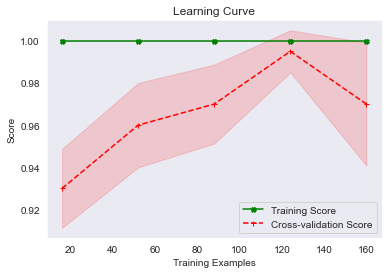

In [745]:
def create_learning_curve(est, x, y):
    train_size, train_scores, test_scores = learning_curve(est, X=x, y=y)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_size, train_mean, color= 'green', marker = 'X', markersize=5, label = "Training Score")
    plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color = 'green' )
    plt.plot(train_size, test_mean, color= 'red', marker = '+', markersize=5, linestyle= '--',label = "Cross-validation Score")
    plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'red' )
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    
    
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())

**Exploring Accuracy, Precision & Recall Graphs**

**Note**: This was done just to familiarize myself more with graphs. The accuracy present here is generic, not specific to any algorithm. 

Accuracy score for this model is 0.9701492537313433


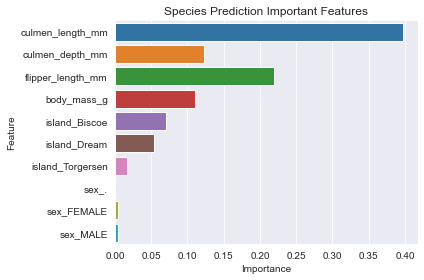

In [746]:
penguin_df = pd.read_csv('penguins_size.csv') 
penguin_df.dropna(inplace=True) 
output = penguin_df['species'] 
features = penguin_df[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']] 
features = pd.get_dummies(features) 
output, uniques = pd.factorize(output) 

x_train, x_test, y_train, y_test = train_test_split(
	features, output, test_size=.8) 
rfc = RandomForestClassifier(random_state=15) 
rfc.fit(x_train, y_train) 
y_pred = rfc.predict(x_test) 
score = accuracy_score(y_pred, y_test) 
print('Accuracy score for this model is {}'.format(score)) 
rf_pickle = open('random_forest_penguin.pickle', 'wb') 
pickle.dump(rfc, rf_pickle) 
rf_pickle.close() 
output_pickle = open('output_penguin.pickle', 'wb') 
pickle.dump(uniques, output_pickle) 
output_pickle.close() 
fig, ax = plt.subplots() 
ax = sns.barplot(x=rfc.feature_importances_, y=features.columns) 
plt.title('Species Prediction Important Features') 
plt.xlabel('Importance') 
plt.ylabel('Feature') 
plt.tight_layout() 

Precision & Recall score for this model is 0.9776119402985075


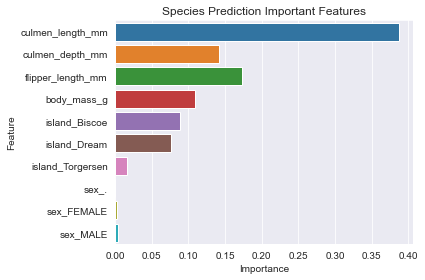

In [747]:
penguin_df = pd.read_csv('penguins_size.csv') 
penguin_df.dropna(inplace=True) 
output = penguin_df['species'] 
features = penguin_df[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']] 
features = pd.get_dummies(features) 
output, uniques = pd.factorize(output) 

x_train, x_test, y_train, y_test = train_test_split(
	features, output, test_size=.8) 
rfc = RandomForestClassifier(random_state=15) 
rfc.fit(x_train, y_train) 
y_pred = rfc.predict(x_test) 
score = precision_score(y_pred, y_test, average='micro') 
print('Precision & Recall score for this model is {}'.format(score)) 
rf_pickle = open('random_forest_penguin.pickle', 'wb') 
pickle.dump(rfc, rf_pickle) 
rf_pickle.close() 
output_pickle = open('output_penguin.pickle', 'wb') 
pickle.dump(uniques, output_pickle) 
output_pickle.close() 
fig, ax = plt.subplots() 
ax = sns.barplot(x=rfc.feature_importances_, y=features.columns) 
plt.title('Species Prediction Important Features') 
plt.xlabel('Importance') 
plt.ylabel('Feature') 
plt.tight_layout() 

In [748]:
val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [749]:
models = {}

for mdl in ['LR', 'SVM', 'RF']:
    models[mdl] = joblib.load('{}_Model.pkl'.format(mdl))

In [750]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average= 'micro'), 3)
    recall = round(recall_score(labels, pred, average= 'micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [751]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 0.97 / Precision: 0.97 / Recall: 0.97 / Latency: 1.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 0.985 / Precision: 0.985 / Recall: 0.985 / Latency: 7.0ms


In [752]:
evaluate_model('LR', models['LR'], te_features, te_labels)
evaluate_model('SVM', models['SVM'], te_features, te_labels)
evaluate_model('RF', models['RF'], te_features, te_labels)

LR -- Accuracy: 0.985 / Precision: 0.985 / Recall: 0.985 / Latency: 2.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 0.985 / Precision: 0.985 / Recall: 0.985 / Latency: 6.0ms


**Second Ratio: 80-10-10**

In [753]:
features = df.drop('species', axis=1)
labels = df['species']

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5, random_state=42)

for dataset in [train_labels, val_labels, test_labels]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


In [754]:
train_features.to_csv('train_features.csv', index=False)
val_features.to_csv('val_features.csv', index=False)
test_features.to_csv('test_features.csv', index=False)

train_labels.to_csv('train_labels.csv', index=False)
val_labels.to_csv('val_labels.csv', index=False)
test_labels.to_csv('test_labels.csv', index=False)

In [755]:
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [756]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
features = 'train_features.csv'
tr_features = pd.read_csv(features)

labels = 'train_labels.csv'
tr_labels = pd.read_csv(labels)

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
lr = LogisticRegression()

parameters = {
    'C':[0.001, 0.01, 0.1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

In [758]:
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'LR_Modell.pkl')

['LR_Modell.pkl']

In [ ]:
def create_learning_curve(est, x, y):
    train_size, train_scores, test_scores = learning_curve(est, X=x, y=y)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_size, train_mean, color= 'green', marker = 'X', markersize=5, label = "Training Score")
    plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color = 'green' )
    plt.plot(train_size, test_mean, color= 'red', marker = '+', markersize=5, linestyle= '--',label = "Cross-validation Score")
    plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'red' )
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    
    
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())

In [760]:
svc = SVC()
parameters = {
    'kernel' : ['linear', 'rbf'],
    'C':[0.1, 1, 10]
}
cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'C': 10, 'kernel': 'linear'}

0.981 (+/-0.024) for {'C': 0.1, 'kernel': 'linear'}
0.723 (+/-0.125) for {'C': 0.1, 'kernel': 'rbf'}
0.981 (+/-0.024) for {'C': 1, 'kernel': 'linear'}
0.723 (+/-0.094) for {'C': 1, 'kernel': 'rbf'}
0.985 (+/-0.028) for {'C': 10, 'kernel': 'linear'}
0.726 (+/-0.103) for {'C': 10, 'kernel': 'rbf'}


In [761]:
cv.best_estimator_

SVC(C=10, kernel='linear')

In [762]:
joblib.dump(cv.best_estimator_, 'SVM_Modell.pkl')

['SVM_Modell.pkl']

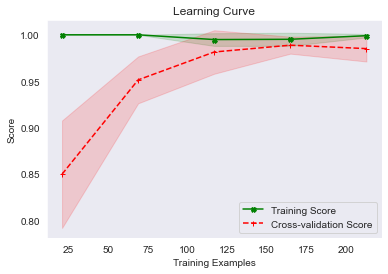

In [763]:
def create_learning_curve(est, x, y):
    train_size, train_scores, test_scores = learning_curve(est, X=x, y=y)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_size, train_mean, color= 'green', marker = 'X', markersize=5, label = "Training Score")
    plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color = 'green' )
    plt.plot(train_size, test_mean, color= 'red', marker = '+', markersize=5, linestyle= '--',label = "Cross-validation Score")
    plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'red' )
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    
    
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())

In [764]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]

}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 32, 'n_estimators': 250}

0.888 (+/-0.14) for {'max_depth': 2, 'n_estimators': 5}
0.955 (+/-0.038) for {'max_depth': 2, 'n_estimators': 50}
0.963 (+/-0.033) for {'max_depth': 2, 'n_estimators': 250}
0.951 (+/-0.03) for {'max_depth': 4, 'n_estimators': 5}
0.974 (+/-0.018) for {'max_depth': 4, 'n_estimators': 50}
0.97 (+/-0.03) for {'max_depth': 4, 'n_estimators': 250}
0.974 (+/-0.029) for {'max_depth': 8, 'n_estimators': 5}
0.985 (+/-0.028) for {'max_depth': 8, 'n_estimators': 50}
0.989 (+/-0.03) for {'max_depth': 8, 'n_estimators': 250}
0.966 (+/-0.015) for {'max_depth': 16, 'n_estimators': 5}
0.989 (+/-0.018) for {'max_depth': 16, 'n_estimators': 50}
0.985 (+/-0.015) for {'max_depth': 16, 'n_estimators': 250}
0.981 (+/-0.023) for {'max_depth': 32, 'n_estimators': 5}
0.989 (+/-0.03) for {'max_depth': 32, 'n_estimators': 50}
0.993 (+/-0.018) for {'max_depth': 32, 'n_estimators': 250}
0.963 (+/-0.053) for {'max_depth': None, 'n_estimators': 5}
0.985 (+/-0.028) 

In [765]:
joblib.dump(cv.best_estimator_, 'RF_Modell.pkl')

['RF_Modell.pkl']

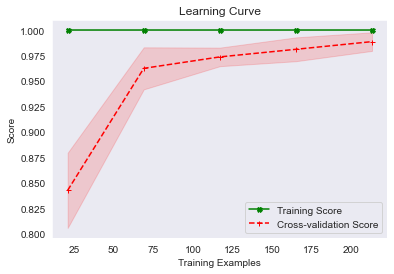

In [766]:
def create_learning_curve(est, x, y):
    train_size, train_scores, test_scores = learning_curve(est, X=x, y=y)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_size, train_mean, color= 'green', marker = 'X', markersize=5, label = "Training Score")
    plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color = 'green' )
    plt.plot(train_size, test_mean, color= 'red', marker = '+', markersize=5, linestyle= '--',label = "Cross-validation Score")
    plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color = 'red' )
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    
    
create_learning_curve(cv.best_estimator_, tr_features, tr_labels.values.ravel())

In [767]:
val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [768]:
models = {}

for mdl in ['LR', 'SVM', 'RF']:
    models[mdl] = joblib.load('{}_Modell.pkl'.format(mdl))

In [769]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average= 'micro'), 3)
    recall = round(recall_score(labels, pred, average= 'micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [770]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 22.9ms


In [771]:
evaluate_model('LR', models['LR'], te_features, te_labels)
evaluate_model('SVM', models['SVM'], te_features, te_labels)
evaluate_model('RF', models['RF'], te_features, te_labels)

LR -- Accuracy: 0.939 / Precision: 0.939 / Recall: 0.939 / Latency: 1.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 22.9ms


Although it is hard to predict, the model that performed the best amongst the three is certainly SVM. This is because SVM was the only algorithm to get an accuracy of 1 in both ratios. The precision and recall were also surprisingly 1 with a latency of 1 ms. The other two algorithms performed well in one ratio but failed to perform well in another. The latency were also high for RF in 80-10-10 although the accuracy was perfect. The accuracy of LR was almost closer to 1 in both ratios with a latency of 1ms. The latency of RF was higher in both ratios. Since the dataset is relatively smaller, SVM was able to provide higher accuracy within a short span of time.  

# Best proportion/Split ratio of Data

The best proprortion amongst the two is quite hard to predict because both have their advantages and disadvantages. However if we look at them from the perception of performance, I think 60-20-20 had a better accuaracy, precision and recall scores along with lower latency values. The 80-10-10 had equally good scores but the latency for RF was way higher than the other two. So, 60-20-20 was the best split ratio out of the two experiments conducted. 

# References 

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
* https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
* https://www.geeksforgeeks.org/how-to-create-boxplot-from-pandas-dataframe/
* https://data36.com/scatter-plot-pandas-matplotlib/